In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
Pokemon = pd.read_csv("modelling_expert_test/pokemon.csv")

In [6]:
Combats = pd.read_csv("modelling_expert_test/combats.csv")

In [5]:
Pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [6]:
Combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


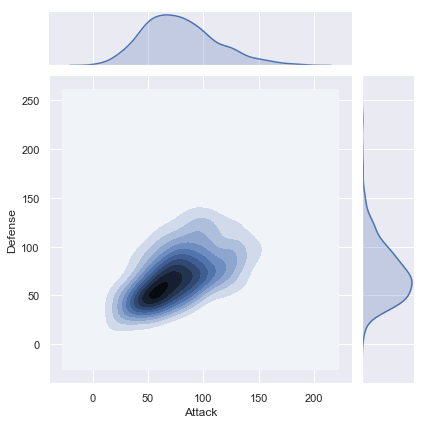

In [16]:
sns.jointplot(x="Attack",y="Defense",data=Pokemon,kind="kde")

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


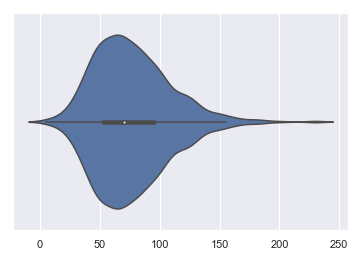

In [21]:
sns.violinplot("Attack",data=Pokemon)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


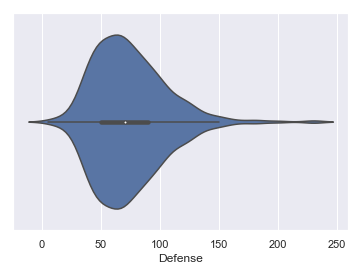

In [17]:
sns.violinplot("Defense",data=Pokemon)

In [ ]:
#Did not remember how to plot the two on the same violin

In [22]:
Pokemon["AttackOverDefense"] = Pokemon.Attack/Pokemon.Defense

In [31]:
Pokemon.sort_values(by="AttackOverDefense").head(3)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AttackOverDefense
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,False,0.043478
139,140,Magikarp,Water,NaN,20,10,55,15,20,80,False,0.181818
484,485,Bronzor,Steel,Psychic,57,24,86,24,86,23,False,0.279070


In [46]:
Pokemon.loc[Combats.Winner.value_counts().index[:10]]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,AttackOverDefense
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,1.900000
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,False,1.588235
438,439,Piplup,Water,NaN,53,51,53,61,56,40,False,0.962264
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True,3.000000
432,433,Turtwig,Grass,NaN,55,68,64,45,55,31,False,1.062500
314,315,Nincada,Bug,Ground,31,45,90,30,30,40,False,0.500000
214,215,Slowking,Water,Psychic,95,75,80,100,110,30,False,0.937500
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,False,0.479167
249,250,Kingdra,Water,Dragon,75,95,95,95,95,85,False,1.000000
155,156,Snorlax,Normal,NaN,160,110,65,65,110,30,False,1.692308


In [65]:
PokeRocks =Pokemon.groupby("Class 1").get_group("Rock")

In [66]:
PokeRocks = PokeRocks.loc[PokeRocks["Class 2"] != "Grass"]

In [67]:
PokeGrass = Pokemon.groupby("Class 1").get_group("Grass")

In [69]:
PokeGrass = PokeGrass.loc[PokeGrass["Class 2"] != "Rock"]

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


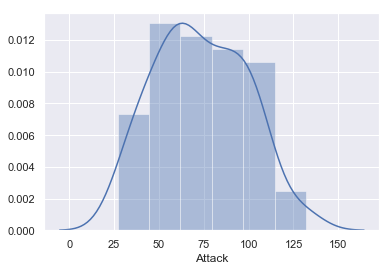

In [71]:
sns.distplot(PokeGrass.Attack)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


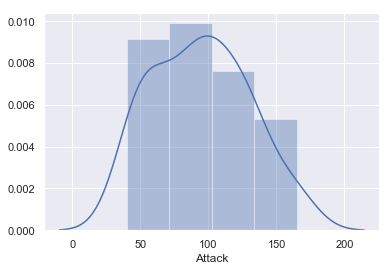

In [74]:
sns.distplot(PokeRocks.Attack)

Pokemons in the class Rock have a stronger attack than the one in the class Grass

In [75]:
PokeRocks.Attack.std()

35.17617845613939

In [78]:
PokeRocks.Attack.mean()

94.38095238095238

In [79]:
PokeGrass.Attack.std()

25.380520236067188

In [80]:
PokeGrass.Attack.mean()

73.21428571428571

The standard deviations are roughly the same but the mean is higher for the PokeRocks, we could use other descriptive statistics, and even a statistical test

## 2. Prediction

In [2]:
import pandas as pd

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [68]:
Pokemon = pd.read_csv("modelling_expert_test/pokemon.csv")
Combats = pd.read_csv("modelling_expert_test/combats.csv")

In [69]:
ColNames= Pokemon.columns.values.copy()

In [70]:
Pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [71]:
Combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [72]:
PokemonFirst = Pokemon.copy()

PokemonFirst.columns.values[0] = "First_pokemon"

PokemonFirst.columns.values[1:] = "First" + ColNames[1:]

In [73]:
CombatsM = pd.merge(Combats,PokemonFirst,on="First_pokemon",sort=False)

In [74]:
ColNames

array(['pid', 'Name', 'Class 1', 'Class 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'], dtype=object)

In [75]:
PokemonSecond = Pokemon.copy()

PokemonSecond.columns.values[0] = "Second_pokemon"

PokemonSecond.columns.values[1:] = "Second" + ColNames[1:]

In [76]:
CombatsMM = pd.merge(CombatsM,PokemonSecond,on="Second_pokemon",sort=False)

In [78]:
# I spend 45min trying to figure out how to merge the data, because I was not using copy() for the columns names
# sorry about that haha, I lost a lot of time (it is 6:40pm), my kernel kept dying as well

In [80]:
CombatsMM.dtypes

First_pokemon       int64
Second_pokemon      int64
Winner              int64
FirstName          object
FirstClass 1       object
FirstClass 2       object
FirstHP             int64
FirstAttack         int64
FirstDefense        int64
FirstSp. Atk        int64
FirstSp. Def        int64
FirstSpeed          int64
FirstLegendary       bool
SecondName         object
SecondClass 1      object
SecondClass 2      object
SecondHP            int64
SecondAttack        int64
SecondDefense       int64
SecondSp. Atk       int64
SecondSp. Def       int64
SecondSpeed         int64
SecondLegendary      bool
dtype: object

In [91]:
CombatsMM.head()

,First_pokemon,Second_pokemon,Winner,FirstName,FirstClass 1,FirstClass 2,FirstHP,FirstAttack,FirstDefense,FirstSp. Atk,...,SecondName,SecondClass 1,SecondClass 2,SecondHP,SecondAttack,SecondDefense,SecondSp. Atk,SecondSp. Def,SecondSpeed,SecondLegendary
0,266,298,298,Larvitar,Rock,Ground,50,64,50,45,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
1,73,298,298,Machop,Fighting,NaN,70,80,50,35,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
2,373,298,298,Whiscash,Water,Ground,110,78,73,76,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
3,536,298,536,Fan Rotom,Electric,Flying,50,65,107,105,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
4,368,298,368,Zangoose,Normal,NaN,73,115,60,60,...,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False


In [ ]:
#we could do this for every numerical feature (also ratio)

CombatsMM["AttackDiff"] = CombatsMM.FirstAttack - CombatsMM.SecondAttack

In [ ]:
#In my opinion there is no need to normalize because the numerical features seem to have similar range
#otherwise use sklearn.preprocessing.Normalizer

In [ ]:
CombatsMMM = CombatsMM.loc[:,(CombatsMM.columns != "FirstName") & (CombatsMM.columns != "SecondName")]

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
Encoder = LabelEncoder()

In [ ]:
CombatsMMM["SecondClass 1"] = Encoder.fit_transform(CombatsMMM["SecondClass 1"])

In [ ]:
CombatsMMM["FirstClass 1"] = Encoder.fit_transform(CombatsMMM["FirstClass 1"],)

In [ ]:
CombatsMMM["Winner"] = CombatsMMM.First_pokemon == CombatsMMM.Winner

In [ ]:
CombatsMMM["Winner"] = Encoder.fit_transform(CombatsMMM["Winner"],)

In [122]:
#No time to preprocess further,deals with NaNs...

In [85]:
from sklearn.model_selection import train_test_split

In [141]:
X_train,X_test,y_train,y_test = train_test_split(CombatsMMM.loc[:,CombatsMMM.columns != "Winner"],CombatsMMM.Winner)

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#can use GradientBoosting, trees, or other...

In [181]:
RF = RandomForestClassifier(max_depth=20,min_samples_split=5,n_estimators=90,random_state=45)

In [182]:
X_train.dtypes

First_pokemon       int64
Second_pokemon      int64
FirstClass 1        int64
FirstClass 2       object
FirstHP             int64
FirstAttack         int64
FirstDefense        int64
FirstSp. Atk        int64
FirstSp. Def        int64
FirstSpeed          int64
FirstLegendary       bool
SecondClass 1       int64
SecondClass 2      object
SecondHP            int64
SecondAttack        int64
SecondDefense       int64
SecondSp. Atk       int64
SecondSp. Def       int64
SecondSpeed         int64
SecondLegendary      bool
AttackDiff          int64
dtype: object

In [183]:
#no time to include more
RF.fit(X_train[["FirstClass 1","FirstHP","FirstAttack","FirstDefense","SecondClass 1","SecondHP","SecondAttack","SecondDefense","AttackDiff"]],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [184]:
Preds = RF.predict(X_test[["FirstClass 1","FirstHP","FirstAttack","FirstDefense","SecondClass 1","SecondHP","SecondAttack","SecondDefense","AttackDiff"]])

In [147]:
import numpy as np

In [185]:
#Pretty poor accuracy with bad model
sum(np.abs(Preds - y_test))/len(Preds)

0.21992

In [186]:
pd.DataFrame([Preds,y_test]).T

,0,1
0,1,0
1,1,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,1
8,0,0
9,0,0


### len(Preds)

In [180]:
len(test)

NameError: name 'test' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression

In [157]:
LogReg = LogisticRegression(random_state=43)

In [158]:
LogReg =LogReg.fit(X_train[["FirstClass 1","FirstHP","FirstAttack","FirstDefense","SecondClass 1","SecondHP","SecondAttack","SecondDefense","AttackDiff"]],y_train)

/Users/emmanuelprofumo/Desktop/DeepLearningPract/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [159]:
Preds2 = LogReg.predict(X_test[["FirstClass 1","FirstHP","FirstAttack","FirstDefense","SecondClass 1","SecondHP","SecondAttack","SecondDefense","AttackDiff"]])

In [161]:
sum(np.abs(Preds2 - y_test))/len(Preds)

0.34048

In [163]:
from sklearn.model_selection import cross_val_score

In [168]:
X = CombatsMMM[["FirstClass 1","FirstHP","FirstAttack","FirstDefense","SecondClass 1","SecondHP","SecondAttack","SecondDefense","AttackDiff"]]

In [169]:
cross_val_score(X=X,y=CombatsMMM.Winner,cv=10,estimator=RF)

array([0.68226355, 0.6838    , 0.7174    , 0.6992    , 0.7038    ,
       0.685     , 0.666     , 0.6714    , 0.7124    , 0.68793759])

In [ ]:
cross_val_score(X=X,y=CombatsMMM.Winner,cv=10,estimator=LogReg)